In [1]:
from datetime import datetime

now = datetime.now()
print(f"Run Start Time: {now}")

Run Start Time: 2021-01-07 05:59:26.795943


In [2]:
# Pre Release
import sys
from pprint import pprint

sys.path.append(os.environ["DEV_SKTIME"])

# print(os.environ['DEV_SKTIME'])

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# import os
# print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
# print("PATH:", os.environ.get('PATH'))

In [5]:
from sktime.forecasting.all import *

%matplotlib inline

In [6]:
from sktime import show_versions

show_versions()


System:
    python: 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Nikhil\.conda\envs\sktime_dev\python.exe
   machine: Windows-10-10.0.18362-SP0

Python dependencies:
          pip: 20.3.3
   setuptools: 51.0.0.post20201207
      sklearn: 0.24.0
       sktime: 0.5.1
  statsmodels: 0.12.1
        numpy: 1.19.4
        scipy: 1.5.4
       Cython: 0.29.17
       pandas: 1.1.5
   matplotlib: 3.3.3
       joblib: 1.0.0
        numba: 0.52.0
     pmdarima: 1.8.0
      tsfresh: 0.17.0


In [7]:
from sklearn.base import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.neighbors import KNeighborsRegressor

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

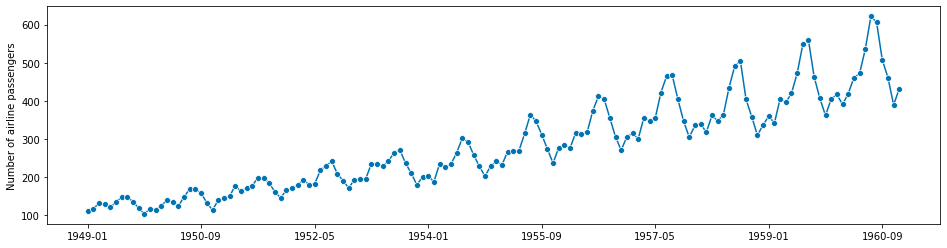

In [8]:
y = load_airline()
plot_series(y)

108 36


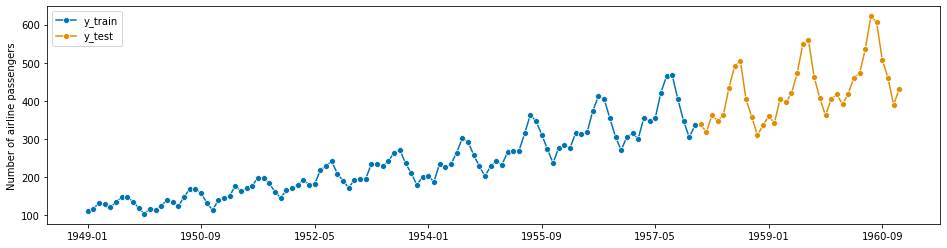

In [9]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [10]:
fh = ForecastingHorizon(y_test.index.to_timestamp(), is_relative=False)
fh

ForecastingHorizon(['1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Period', freq='MS', is_relative=False)

In [11]:
fh = ForecastingHorizon(np.arange(len(y_test)) + 1, is_relative=True)
fh

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)

In [12]:
fh = ForecastingHorizon(np.arange(len(y_test)) + 1, is_relative=False)
fh

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=False)

In [13]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', freq='M', is_relative=False)

In [14]:
print(type(y_test.index))
print(type(y_test.index.to_timestamp()))

print(type(y_test.index[0]))
print(type(y_test.index.to_timestamp()[0]))

print((y_test.index))
print((y_test.index.to_timestamp()))

<class 'pandas.core.indexes.period.PeriodIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.period.Period'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
PeriodIndex(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', freq='M')
DatetimeIndex(['1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '

## Temporal Cross Validation

### AutoARIMA

AutoARIMA(sp=12, suppress_warnings=True)


0.04117062367046531

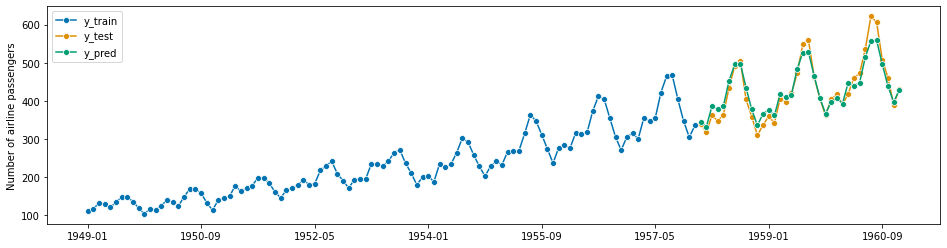

In [15]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(forecaster)
smape_loss(y_test, y_pred)

Forecast_horizon: ForecastingHorizon([1], dtype='int64', is_relative=True)
Window Length: 36
Fitting 72 folds for each of 4 candidates, totalling 288 fits
Wall time: 17.6 s
AutoARIMA(sp=12, suppress_warnings=True)


0.04117062367046531

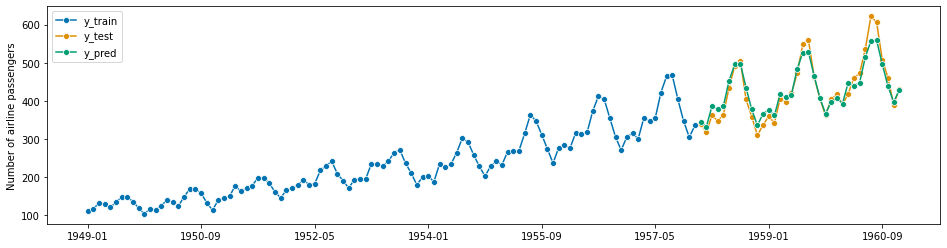

In [16]:
forecaster_param_grid = {"sp": [3, 6, 12, 24]}
forecaster = AutoARIMA(suppress_warnings=True)

cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)
print(f"Forecast_horizon: {cv.get_fh()}")
print(f"Window Length: {cv.window_length}")
gscv_arima = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=forecaster_param_grid, verbose=True
)
%time gscv_arima.fit(y_train)
y_pred = gscv_arima.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# print(gscv_arima.cv_results_)
print(gscv_arima.best_forecaster_)
smape_loss(y_test, y_pred)

**OBSERVATIONS:**

* Grid Search picks the same parameters as manual search, hence no improvement

### AutoETS

AutoETS(auto=True, n_jobs=-1, sp=12)


0.06317641245925658

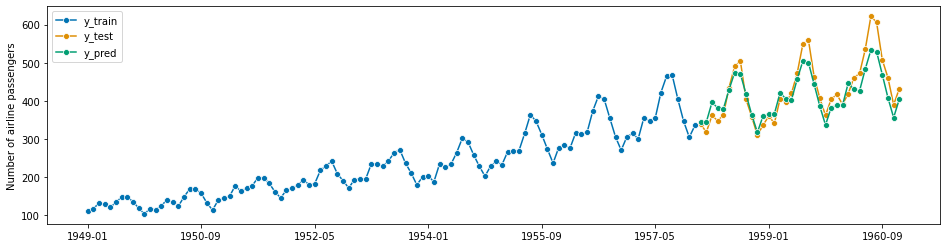

In [17]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(forecaster)
smape_loss(y_test, y_pred)

Forecast_horizon: ForecastingHorizon([1], dtype='int64', is_relative=True)
Window Length: 36
Fitting 72 folds for each of 4 candidates, totalling 288 fits
Wall time: 24.3 s
AutoETS(auto=True, sp=24)


0.06212762020056753

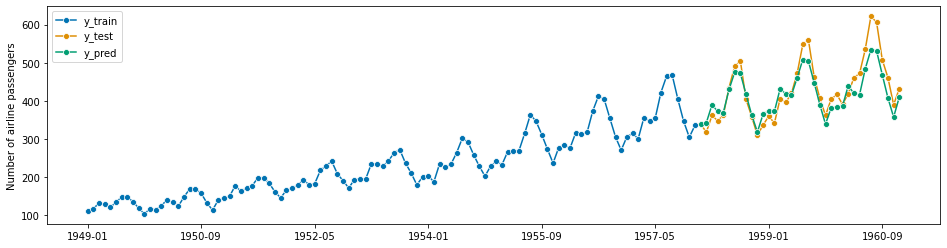

In [18]:
from sktime.forecasting.ets import AutoETS

forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    # 'error': ["add", "mul"],
    # 'trend': ["add", "mul", None],
    # 'damped_trend': [True, False],
    # 'seasonal': ["add", "mul", None]
}
forecaster = AutoETS(auto=True)

cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)
print(f"Forecast_horizon: {cv.get_fh()}")
print(f"Window Length: {cv.window_length}")
gscv_ets = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=forecaster_param_grid, verbose=True
)
%time gscv_ets.fit(y_train)
y_pred = gscv_ets.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# print(gscv_ets.cv_results_)
print(gscv_ets.best_forecaster_)
smape_loss(y_test, y_pred)

**OBSERVATIONS:**

* Grid Search picks better parameters than as manual search, hence slight improvement

### More Grid Search Experiments (With Exponential Models)

ExponentialSmoothing(seasonal='multiplicative', sp=12)


0.13039955606496054

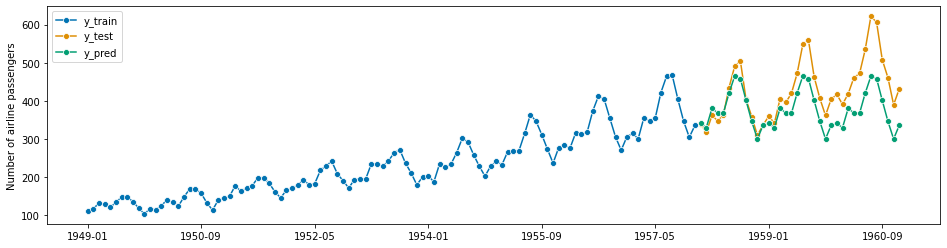

In [19]:
# SES
forecaster = ExponentialSmoothing(seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(forecaster)
smape_loss(y_test, y_pred)

ExponentialSmoothing(seasonal='multiplicative', sp=12, trend='add')


0.05108225285898997

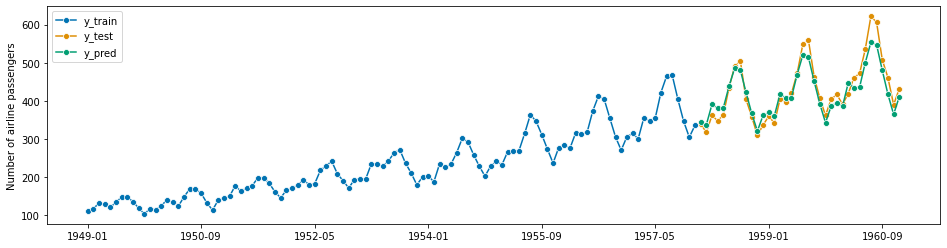

In [20]:
# Holt
forecaster = ExponentialSmoothing(
    trend="add", damped_trend=False, seasonal="multiplicative", sp=12
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(forecaster)
smape_loss(y_test, y_pred)

ExponentialSmoothing(damped_trend=True, seasonal='multiplicative', sp=12,
                     trend='add')


0.0721847620249731

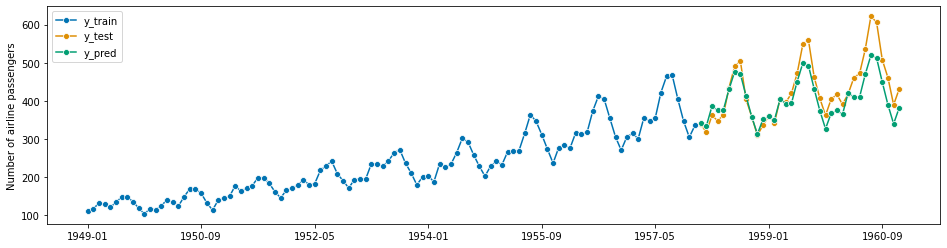

In [21]:
# Damped
forecaster = ExponentialSmoothing(
    trend="add", damped_trend=True, seasonal="multiplicative", sp=12
)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(forecaster)
smape_loss(y_test, y_pred)

In [22]:
SlidingWindowSplitter?

Init signature: SlidingWindowSplitter(fh=1, window_length=10, step_length=1, initial_window=None, start_with_window=False)
Docstring:     
Sliding window splitter

Parameters
----------
fh : int, list or np.array
    Forecasting horizon
window_length : int
step_length : int
initial_window : int
start_with_window : bool, optional (default=False)

Examples
--------
For example for `window_length = 5`, `step_length = 1` and `fh = 3`
here is a representation of the folds::

|-----------------------|
| * * * * * x x x - - - |
| - * * * * * x x x - - |
| - - * * * * * x x x - |
| - - - * * * * * x x x |


``*`` = training fold.

``x`` = test fold.
File:           c:\users\nikhil\onedrive - southern methodist university\my_libraries\my_python_libraries\sktime_forked\sktime\forecasting\model_selection\_split.py
Type:           type


Fitting 72 folds for each of 72 candidates, totalling 5184 fits
Wall time: 19.7 s
Best Model: ExponentialSmoothing(damped_trend=True, seasonal='mul', sp=12, trend='add')


0.0721847620249731

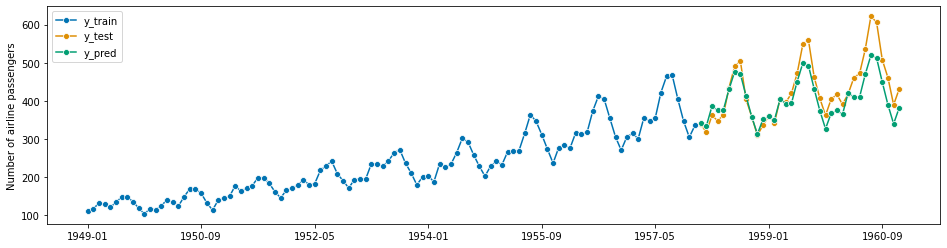

In [23]:
forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    "trend": ["add", "mul", None],
    "damped_trend": [True, False],
    "seasonal": ["add", "mul", None],
}
forecaster = ExponentialSmoothing()

cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)
gscv_expo = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=forecaster_param_grid, verbose=True
)
%time gscv_expo.fit(y_train)
y_pred = gscv_expo.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# print(gscv_expo.cv_results_)
print(f"Best Model: {gscv_expo.best_forecaster_}")
smape_loss(y_test, y_pred)

In [24]:
sort_index = np.argsort(gscv_expo.cv_results_["mean_test_sMAPE"])
for index in sort_index:
    print(
        f"{index}: {gscv_expo.cv_results_['params'][index]}, {round(gscv_expo.cv_results_['mean_test_sMAPE'][index],4)}"
    )

18: {'damped_trend': True, 'seasonal': 'mul', 'sp': 12, 'trend': 'add'}, 0.0388
9: {'damped_trend': True, 'seasonal': 'add', 'sp': 24, 'trend': 'add'}, 0.0801
54: {'damped_trend': False, 'seasonal': 'mul', 'sp': 12, 'trend': 'add'}, 0.1021
42: {'damped_trend': False, 'seasonal': 'add', 'sp': 12, 'trend': 'add'}, 0.1027
21: {'damped_trend': True, 'seasonal': 'mul', 'sp': 24, 'trend': 'add'}, 0.103
45: {'damped_trend': False, 'seasonal': 'add', 'sp': 24, 'trend': 'add'}, 0.1043
57: {'damped_trend': False, 'seasonal': 'mul', 'sp': 24, 'trend': 'add'}, 0.1173
58: {'damped_trend': False, 'seasonal': 'mul', 'sp': 24, 'trend': 'mul'}, 0.1215
48: {'damped_trend': False, 'seasonal': 'mul', 'sp': 3, 'trend': 'add'}, 0.1253
36: {'damped_trend': False, 'seasonal': 'add', 'sp': 3, 'trend': 'add'}, 0.1264
66: {'damped_trend': False, 'seasonal': None, 'sp': 12, 'trend': 'add'}, 0.1293
69: {'damped_trend': False, 'seasonal': None, 'sp': 24, 'trend': 'add'}, 0.1293
63: {'damped_trend': False, 'seasonal

**OBSERVATIONS:**

When doing grid search, `damped_trend` = True (index 18) edges out `damped_trend` = False (index 54). This is likely due to the following factor(s):

1. The grid search is trained on only the 1st 50% of the training data, which does not see multiplicative trend. If the model was fitted on the entire train dataset as in the case of individual models, it would have seem the beginning of multiplicative trend and hence would have preferred that. 

### Prophet

sktime also provides an interface to fbprophet by Facebook. Please note that fbprophet is strongly related to data with a time stamp of type pd.DatetimeIndex, so we have to convert the index type first:

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.06834338435258536

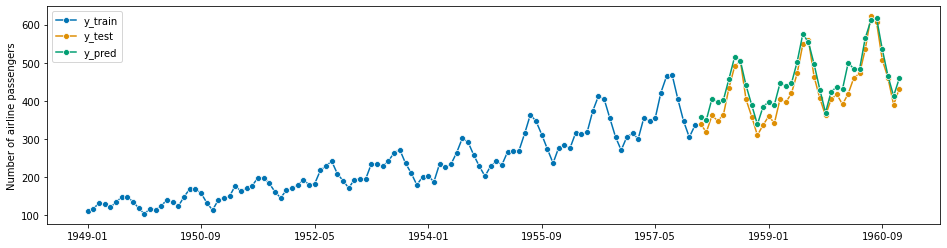

In [25]:
from sktime.forecasting.fbprophet import Prophet

# Convert index to pd.DatetimeIndex
z = y.copy()
z.index = y.index.to_timestamp()
z_train, z_test = temporal_train_test_split(z, test_size=36)

forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "US"},
    yearly_seasonality=True,
)
forecaster.fit(z_train)
y_pred = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]))

y_pred.index = y_test.index
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Fitting 72 folds for each of 32 candidates, totalling 2304 fits
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbp

0.05663365873607803

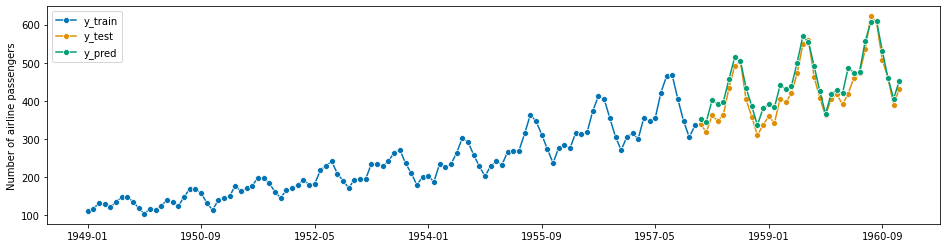

In [26]:
# https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning
forecaster_param_grid = {
    "changepoint_prior_scale": [0.001, 0.01, 0.1, 0.5],
    "seasonality_prior_scale": [0.01, 0.1, 1.0, 10.0],
    "seasonality_mode": ["multiplicative", "additive"],
}
forecaster = Prophet(
    add_country_holidays={"country_name": "US"},
)

cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)
gscv_prophet = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=forecaster_param_grid, verbose=True
)
%time gscv_prophet.fit(z_train)
y_pred = gscv_prophet.predict(fh.to_relative(cutoff=y_train.index[-1]))
y_pred.index = y_test.index
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# print(gscv_prophet.cv_results_)
print(f"Best Model: {gscv_prophet.best_forecaster_}")
smape_loss(y_test, y_pred)

**OBSERVATIONS**

* The Grid Search CV variant offers some improvement in the performance since we are picking better parameters for `Prophet` compared to manual search 

### Sklearn Models

#### Random Forest

0.12846752890215776

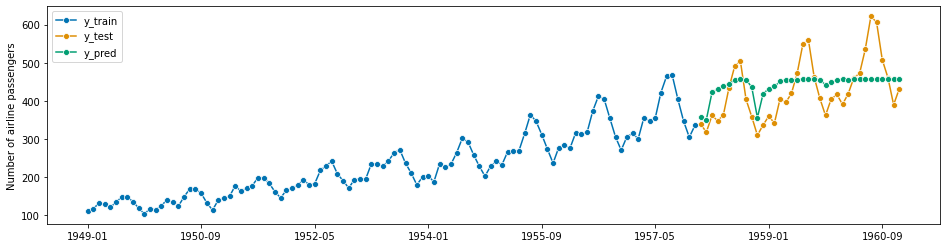

In [27]:
# Simple Baseline (with non-stationary data)
# tuning the 'n_estimator' hyperparameter of RandomForestRegressor from scikit-learn
regressor_param_grid = {"n_estimators": [100, 200, 300]}
forecaster_param_grid = {"window_length": [5, 10, 15, 20, 25]}

# create a tunnable regressor with GridSearchCV
regressor = GridSearchCV(RandomForestRegressor(), param_grid=regressor_param_grid)
forecaster = ReducedRegressionForecaster(
    regressor, window_length=15, strategy="recursive"
)

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

**OBSERVATIONS**

* Results are not good since we have not taken care of seasonality and trend. Lets try to so that next.

Wall time: 5.72 s


0.05444416284794292

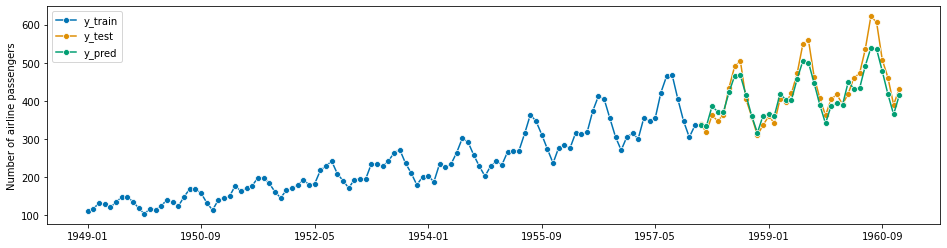

In [28]:
# Baseline with detrending and deseasonalize (stationary data)
forecaster = TransformedTargetForecaster(
    [
        ("deseasonalise", Deseasonalizer(model="multiplicative", sp=12)),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
        (
            "forecast",
            ReducedRegressionForecaster(
                regressor=regressor, window_length=12, strategy="recursive"
            ),
        ),
    ]
)
%time forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

**OBSERVATIONS**

* Much better. Lets see if this can be improved with Grid Search (with CV)

Fitting 72 folds for each of 30 candidates, totalling 2160 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candid

0.04460758262517609

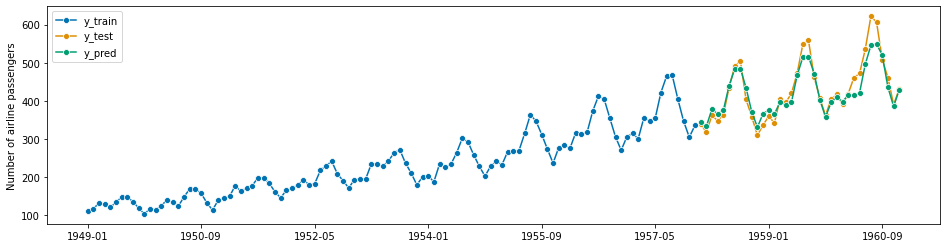

In [15]:
# GS Variant detrending and deseasonalize (stationary data)

# tuning the 'n_estimator' hyperparameter of RandomForestRegressor from scikit-learn
regressor_param_grid = {"n_estimators": [100, 200, 300]}
forecaster_param_grid = {
    "deseasonalise__sp": [6, 12, 24],
    "detrend__forecaster__degree": [1, 2],
    "forecaster__window_length": [10, 12, 15, 20, 25],
}

# create a tunnable regressor with GridSearchCV
regressor = GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=regressor_param_grid, verbose=1
)
forecaster = TransformedTargetForecaster(
    [
        ("deseasonalise", Deseasonalizer(model="multiplicative")),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster())),
        (
            "forecaster",
            ReducedRegressionForecaster(regressor=regressor, strategy="recursive"),
        ),
    ]
)

# cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5), start_with_window=True)  # TODO: Does not work with start_with_window=False
cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)
gscv = ForecastingGridSearchCV(
    forecaster, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

%time gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

In [30]:
print(f"Best Params: {gscv.best_params_}")
print(f"Detrender Degree: {gscv.forecaster.named_steps['detrend'].forecaster.degree}")
print(
    f"Internal Regressor: {gscv.forecaster.named_steps['forecaster'].regressor}"
)  # Unable to print best_params_
pprint(f"TCV Results: {gscv.cv_results_}")

Best Params: {'deseasonalise__sp': 6, 'detrend__forecaster__degree': 1, 'forecaster__window_length': 25}
Detrender Degree: 1
Internal Regressor: GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [100, 200, 300]})
("TCV Results: {'mean_fit_time': array([5.30710435, 5.482342  , 5.18911886, "
 '5.39324164, 5.08383369,\n'
 '       5.400527  , 4.99487185, 5.00192285, 5.06798911, 5.14796209,\n'
 '       4.92622399, 5.25542808, 5.2082839 , 5.56415677, 5.26656055,\n'
 '       5.28441834, 5.34774113, 5.37948895, 5.18634081, 5.18820477,\n'
 '       5.20366335, 5.07387495, 5.3106153 , 5.47455335, 5.14793277,\n'
 '       5.19101763, 5.39406705, 5.27458239, 5.34946442, 5.04510808]), '
 "'mean_score_time': array([0.75835681, 0.75351667, 0.78689504, 0.60336256, "
 '0.40497017,\n'
 '       0.56159925, 0.60596967, 0.4248631 , 0.57154632, 0.57008648,\n'
 '       0.3890245 , 0.76498747, 0.43982339, 0.76502752, 0.61538815,\n'
 '       0.78437948, 0.798

**OBSERVATIONS**

* Improvement in the results as it seems like deseasonalizing with period of 6 is better. Who would have guessed this?

### TODO
* Check why it says only 15 candidates. Should be much more than that. Looks like internal regressor parameters are not counted.
* How does the `window_length` in `cv` differ from that in `forecaster`?

## Ensembling with Grid Search CV

Wall time: 11.6 s


0.04942764864434326

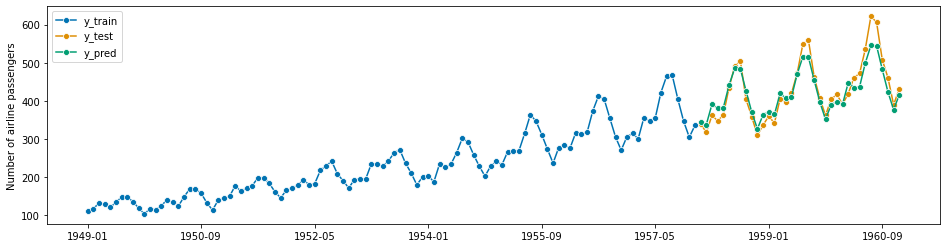

In [31]:
# Baseline (without Grid Search and without CV)
forecaster = EnsembleForecaster(
    [
        ("autoARIMA", AutoARIMA(sp=12, suppress_warnings=True)),
        ("autoETS", AutoETS(auto=True, sp=12, n_jobs=-1)),
        # ("fbprophet", Prophet(seasonality_mode="multiplicative", add_country_holidays={"country_name": "US"}))  # Does not work yet (https://github.com/alan-turing-institute/sktime/issues/561)
    ]
)
# %time forecaster.fit(z_train)
%time forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 4 candidates, totalling 288 fits
Wall time: 42.3 s


0.04894734401857856

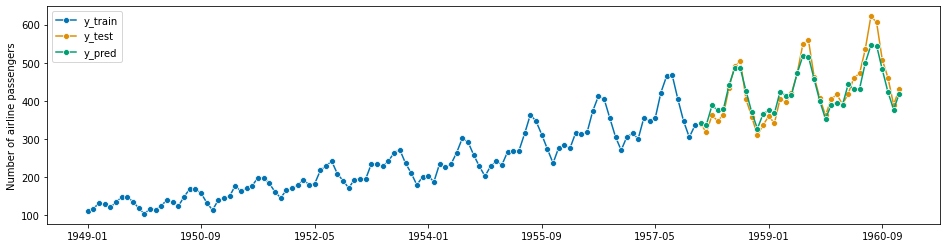

In [32]:
# With Grid Search and with CV (variant 1A: Statistical only)
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS

# 1st Base Learner
cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)

forecaster_param_grid = {"sp": [3, 6, 12, 24]}
forecaster_arima = AutoARIMA(suppress_warnings=True)
gscv_arima = ForecastingGridSearchCV(
    forecaster_arima, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

# 2nd Base Learner
forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    # 'error': ["add", "mul"],
    # 'trend': ["add", "mul", None],
    # 'damped_trend': [True, False],
    # 'seasonal': ["add", "mul", None]
}
forecaster_ets = AutoETS(auto=True)
gscv_ets = ForecastingGridSearchCV(
    forecaster_ets, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

# 3rd Base Learner
forecaster_param_grid = {
    "changepoint_prior_scale": [0.001, 0.01, 0.1, 0.5],
    "seasonality_prior_scale": [0.01, 0.1, 1.0, 10.0],
    "seasonality_mode": ["multiplicative", "additive"],
}
forecaster_prophet = Prophet(add_country_holidays={"country_name": "US"})
gscv_prophet = ForecastingGridSearchCV(
    forecaster_prophet, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_ensemble = EnsembleForecaster(
    [
        ("autoARIMA", gscv_arima),
        ("autoETS", gscv_ets),
        # ("fbprophet", gscv_prophet)  # Does not work yet
    ]
)
%time forecaster_ensemble.fit(y_train)
y_pred = forecaster_ensemble.predict(fh)
y_pred.index = y_test.index
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

**OBSERVATIONS**

* The Grid Search CV variant offers some improvement in the performance since we are picking better parameters for `autoETS` compared to manual search (`autoARIMA` GC picks same parameters as manual search)

Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 30 candidates, totalling 2160 fits
Wall time: 3min 52s


0.04572353293199909

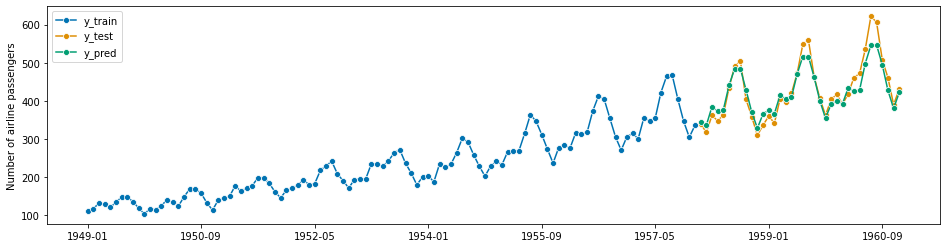

In [33]:
# With Grid Search and with CV (variant 1B: Statistical + Includes sklearn forecaster also)
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS

# 1st Base Learner
cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)

forecaster_param_grid = {"sp": [3, 6, 12, 24]}
forecaster_arima = AutoARIMA(suppress_warnings=True)
gscv_arima = ForecastingGridSearchCV(
    forecaster_arima, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

# 2nd Base Learner
forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    # 'error': ["add", "mul"],
    # 'trend': ["add", "mul", None],
    # 'damped_trend': [True, False],
    # 'seasonal': ["add", "mul", None]
}
forecaster_ets = AutoETS(auto=True)
gscv_ets = ForecastingGridSearchCV(
    forecaster_ets, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

# 3rd Base Learner
forecaster_param_grid = {
    "changepoint_prior_scale": [0.001, 0.01, 0.1, 0.5],
    "seasonality_prior_scale": [0.01, 0.1, 1.0, 10.0],
    "seasonality_mode": ["multiplicative", "additive"],
}
forecaster_prophet = Prophet(add_country_holidays={"country_name": "US"})
gscv_prophet = ForecastingGridSearchCV(
    forecaster_prophet, cv=cv, param_grid=forecaster_param_grid, verbose=True
)


# 4th Base Learner
regressor_param_grid = {"n_estimators": [100, 200, 300]}
forecaster_param_grid = {
    "deseasonalise__sp": [6, 12, 24],
    "detrend__forecaster__degree": [1, 2],
    "forecaster__window_length": [10, 12, 15, 20, 25],
}

# create a tunnable regressor with GridSearchCV
regressor = GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=regressor_param_grid
)
forecaster_rf = TransformedTargetForecaster(
    [
        ("deseasonalise", Deseasonalizer(model="multiplicative")),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster())),
        (
            "forecaster",
            ReducedRegressionForecaster(regressor=regressor, strategy="recursive"),
        ),
    ]
)
gscv_rf = ForecastingGridSearchCV(
    forecaster_rf, cv=cv, param_grid=forecaster_param_grid, verbose=True
)


forecaster_ensemble = EnsembleForecaster(
    [
        ("autoARIMA", gscv_arima),
        ("autoETS", gscv_ets),
        # ("fbprophet", gscv_prophet)  # Does not work yet
        ("rf", gscv_rf),
    ]
)
%time forecaster_ensemble.fit(y_train)
y_pred = forecaster_ensemble.predict(fh)
y_pred.index = y_test.index
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

**OBSERVATIONS**

* The Grid Search CV variant offers some improvement in the performance since we are a better model (rf) into the mix.

Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 72 candidates, totalling 5184 fits
Wall time: 1min 22s


0.056080225995128075

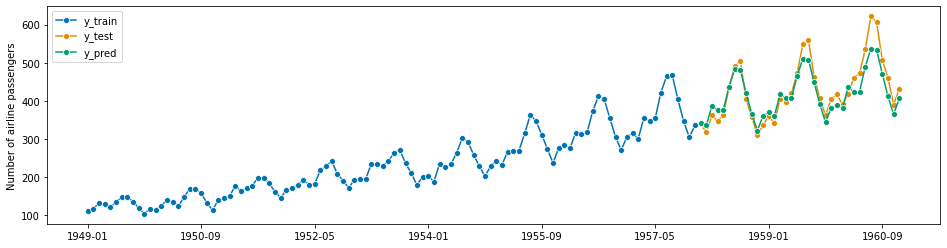

In [34]:
# With Grid Search and with CV (Variant 2)
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS

cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)

forecaster_param_grid = {"sp": [3, 6, 12, 24]}
forecaster_arima = AutoARIMA(suppress_warnings=True)
gscv_arima = ForecastingGridSearchCV(
    forecaster_arima, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    # 'error': ["add", "mul"],
    # 'trend': ["add", "mul", None],
    # 'damped_trend': [True, False],
    # 'seasonal': ["add", "mul", None]
}
forecaster_ets = AutoETS(auto=True)
gscv_ets = ForecastingGridSearchCV(
    forecaster_ets, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    "trend": ["add", "mul", None],
    "damped_trend": [True, False],
    "seasonal": ["add", "mul", None],
}
forecaster_expo = ExponentialSmoothing()
gscv_expo = ForecastingGridSearchCV(
    forecaster_expo, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_ensemble = EnsembleForecaster(
    [("autoARIMA", gscv_arima), ("autoETS", gscv_ets), ("autoExpo", gscv_expo)]
)
%time forecaster_ensemble.fit(y_train)
y_pred = forecaster_ensemble.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

**OBSERVATION**

* Final metric is reduced due to the addition of the `autoExpo` model which did not perform as well as the `autoARIMA` and `autoETS` model


Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 4 candidates, totalling 288 fits
Wall time: 44.3 s


0.06458488133045698

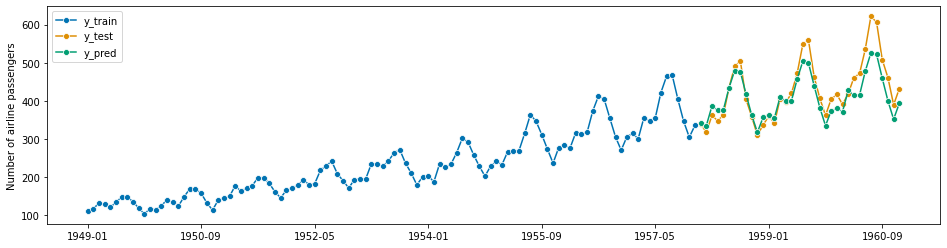

In [35]:
# With Grid Search and with CV (Variant 3)
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS

cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)

forecaster_param_grid = {"sp": [3, 6, 12, 24]}
forecaster_arima = AutoARIMA(suppress_warnings=True)
gscv_arima = ForecastingGridSearchCV(
    forecaster_arima, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    # 'error': ["add", "mul"],
    # 'trend': ["add", "mul", None],
    # 'damped_trend': [True, False],
    # 'seasonal': ["add", "mul", None]
}
forecaster_ets = AutoETS(auto=True)
gscv_ets = ForecastingGridSearchCV(
    forecaster_ets, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    "trend": ["add", "mul", None],
    "damped_trend": [True, False],
    "seasonal": ["add", "mul", None],
}
forecaster_expo = ExponentialSmoothing()
gscv_expo = ForecastingGridSearchCV(
    forecaster_expo, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_ensemble = EnsembleForecaster(
    [
        ("autoARIMA", gscv_arima),
        ("autoETS", gscv_ets),
        ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
        (
            "holt",
            ExponentialSmoothing(
                trend="add", damped_trend=False, seasonal="multiplicative", sp=12
            ),
        ),
        (
            "damped",
            ExponentialSmoothing(
                trend="add", damped_trend=True, seasonal="multiplicative", sp=12
            ),
        ),
    ]
)
%time forecaster_ensemble.fit(y_train)
y_pred = forecaster_ensemble.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 4 candidates, totalling 288 fits
Fitting 72 folds for each of 72 candidates, totalling 5184 fits
Wall time: 1min 22s


0.0657139459733176

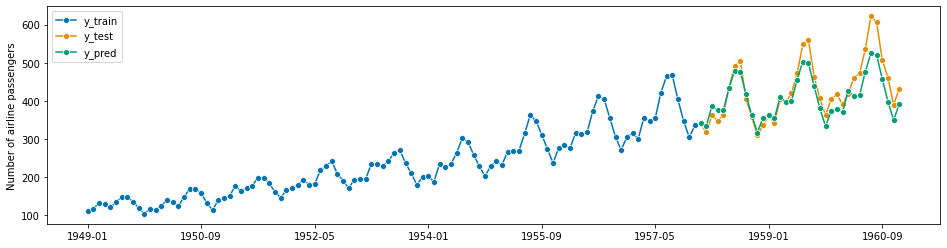

In [36]:
# With Grid Search and with CV (Variant 3)
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS

cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.5),
    start_with_window=True,
    window_length=36,
    # fh=np.arange(12) + 1  # Not Supported Yet (Prediction can only be the next time point for now)
)

forecaster_param_grid = {"sp": [3, 6, 12, 24]}
forecaster_arima = AutoARIMA(suppress_warnings=True)
gscv_arima = ForecastingGridSearchCV(
    forecaster_arima, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    # 'error': ["add", "mul"],
    # 'trend': ["add", "mul", None],
    # 'damped_trend': [True, False],
    # 'seasonal': ["add", "mul", None]
}
forecaster_ets = AutoETS(auto=True)
gscv_ets = ForecastingGridSearchCV(
    forecaster_ets, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_param_grid = {
    "sp": [3, 4, 12, 24],
    "trend": ["add", "mul", None],
    "damped_trend": [True, False],
    "seasonal": ["add", "mul", None],
}
forecaster_expo = ExponentialSmoothing()
gscv_expo = ForecastingGridSearchCV(
    forecaster_expo, cv=cv, param_grid=forecaster_param_grid, verbose=True
)

forecaster_ensemble = EnsembleForecaster(
    [
        ("autoARIMA", gscv_arima),
        ("autoETS", gscv_ets),
        ("autoExpo", gscv_expo),
        ("ses", ExponentialSmoothing(seasonal="multiplicative", sp=12)),
        (
            "holt",
            ExponentialSmoothing(
                trend="add", damped_trend=False, seasonal="multiplicative", sp=12
            ),
        ),
        (
            "damped",
            ExponentialSmoothing(
                trend="add", damped_trend=True, seasonal="multiplicative", sp=12
            ),
        ),
    ]
)
%time forecaster_ensemble.fit(y_train)
y_pred = forecaster_ensemble.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)